**Part A - Setting up the imports:**

In [1]:
import pandas as pd

The dataset that we are using for this project is found at this website: [Vehicle Claim Fraud Detection](https://www.kaggle.com/datasets/shivamb/vehicle-claim-fraud-detection/data)

In [2]:
df = pd.read_csv("fraud_oracle.csv")
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


We call `df.info()` and `df.describe()` to understand:
* how many rows and columns exist
* what data types each column has
* whether any columns contain missing or inconsistent values.

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


From `df.info()`, we can see that 24 columns are stored as objects (strings).
Some of these are categorical, while others should be numerical.

**Part B - Parse and Clean the Data**

To parse and clean the data, we:
* Convert numeric strings such as `PastNumberOfClaims`, `NumberOfSuppliments`, and `NumberOfCars` into integers so they can be used in calculations.
* Map “Yes” or “No” values, such as `PoliceReportFiled`, `WitnessPresent` to 1 and 0 for modeling and readablility.
* Standardize text fields such as `Month`, `DayOfWeek`, `AccidentArea` by converting them to lowercase for consistency.

These steps make the data easier for statistical analysis.

In [4]:
df["PastNumberOfClaims"] = pd.to_numeric(df["PastNumberOfClaims"].str.extract(r'(\d+)')[0], errors='coerce').fillna(0).astype(int)
df["NumberOfSuppliments"] = pd.to_numeric(df["NumberOfSuppliments"].str.extract(r'(\d+)')[0], errors='coerce').fillna(0).astype(int)
df["NumberOfCars"] = pd.to_numeric(df["NumberOfCars"].str.extract(r'(\d+)')[0], errors='coerce').fillna(0).astype(int)

# convert Yes/No columns to binary
df["PoliceReportFiled"] = df["PoliceReportFiled"].map({"Yes": 1, "No": 0})
df["WitnessPresent"] = df["WitnessPresent"].map({"Yes": 1, "No": 0})

# standardize text fields
df["Month"] = df["Month"].str.lower()
df["DayOfWeek"] = df["DayOfWeek"].str.lower()
df["AccidentArea"] = df["AccidentArea"].str.lower()


Some of these columns included text like “2 to 4” or “none.” We used a regular expression `(r'(\d+)')` to extract only the numeric part of each value, converted everything to integers, and filled missing values with zeros. This ensures there are no NaN values and every column contains clean, numeric data.


**Part C - Organizing the Data**

After cleaning and parsing, the next step is to organize our dataset so it is easy to read and analyze. For organizing, we:

* Remove unnecessary identifier columns such as PolicyNumber and RepNumber since they do not add analytical value.
* Reorder the remaining columns to group related attributes together. For instance, policy details, driver information, and the fraud label are placed together.

In [5]:
df = df.drop(columns=["PolicyNumber", "RepNumber"]) # drop these columns

# reorder columns
df = df[["FraudFound_P", "AccidentArea", "Make", "VehicleCategory",
         "VehiclePrice", "Age", "Sex", "MaritalStatus", "Fault",
         "DriverRating", "Deductible", "PastNumberOfClaims",
         "NumberOfSuppliments", "NumberOfCars",
         "PoliceReportFiled", "WitnessPresent", "BasePolicy"]]

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   FraudFound_P         15420 non-null  int64 
 1   AccidentArea         15420 non-null  object
 2   Make                 15420 non-null  object
 3   VehicleCategory      15420 non-null  object
 4   VehiclePrice         15420 non-null  object
 5   Age                  15420 non-null  int64 
 6   Sex                  15420 non-null  object
 7   MaritalStatus        15420 non-null  object
 8   Fault                15420 non-null  object
 9   DriverRating         15420 non-null  int64 
 10  Deductible           15420 non-null  int64 
 11  PastNumberOfClaims   15420 non-null  int64 
 12  NumberOfSuppliments  15420 non-null  int64 
 13  NumberOfCars         15420 non-null  int64 
 14  PoliceReportFiled    15420 non-null  int64 
 15  WitnessPresent       15420 non-null  int64 
 16  Base

,FraudFound_P,AccidentArea,Make,VehicleCategory,VehiclePrice,Age,Sex,MaritalStatus,Fault,DriverRating,Deductible,PastNumberOfClaims,NumberOfSuppliments,NumberOfCars,PoliceReportFiled,WitnessPresent,BasePolicy
0,0,urban,Honda,Sport,more than 69000,21,Female,Single,Policy Holder,1,300,0,0,3,0,0,Liability
1,0,urban,Honda,Sport,more than 69000,34,Male,Single,Policy Holder,4,400,0,0,1,1,0,Collision
2,0,urban,Honda,Sport,more than 69000,47,Male,Married,Policy Holder,3,400,1,0,1,0,0,Collision
3,0,rural,Toyota,Sport,20000 to 29000,65,Male,Married,Third Party,2,400,1,5,1,1,0,Liability
4,0,urban,Honda,Sport,more than 69000,27,Female,Single,Third Party,1,400,0,0,1,0,0,Collision


**Basic Data Exploration and Summary Statistics**

Each row now clearly represents one insurance claim, and each column describes a meaningful feature.

**Method 1**: Descriptive Statistics

Hypothysis Question: Is fraud over-represented in specific policy categories?

--- Finding 1: Fraud Count by BasePolicy ---
BasePolicy
All Perils    452
Collision     435
Liability      36
Name: count, dtype: int64

--- Finding 2: Fraud Rate by BasePolicy ---
BasePolicy
All Perils    0.101596
Collision     0.072962
Liability     0.007187
Name: FraudFound_P, dtype: float64


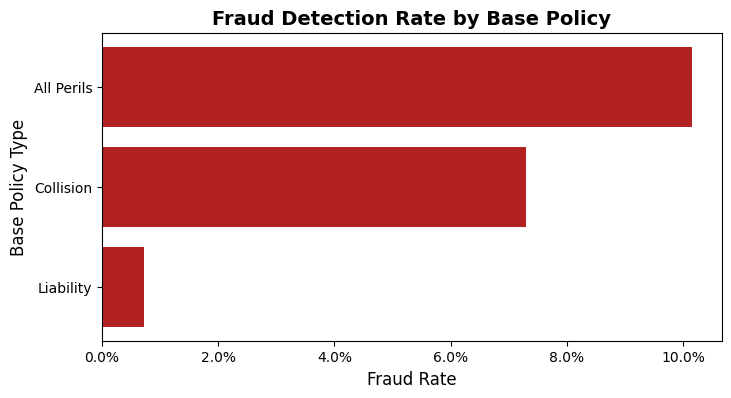

In [6]:
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt

# 1. Finding by COUNT
print("--- Finding 1: Fraud Count by BasePolicy ---")
fraud_counts = df[df['FraudFound_P']==1]['BasePolicy'].value_counts()
print(fraud_counts)

# 2. Finding by RATE
print("\n--- Finding 2: Fraud Rate by BasePolicy ---")
fraud_rate = df.groupby('BasePolicy')['FraudFound_P'].mean().sort_values(ascending=False)
print(fraud_rate)

fig, ax = plt.subplots(figsize=(8, 4))
policies = fraud_rate.index
rates = fraud_rate.values

ax.barh(policies, rates, color='firebrick')

ax.set_title('Fraud Detection Rate by Base Policy', fontsize=14, weight='bold')
ax.set_xlabel('Fraud Rate', fontsize=12)
ax.set_ylabel('Base Policy Type', fontsize=12)
ax.xaxis.set_major_formatter(PercentFormatter(1.0))
ax.invert_yaxis()
plt.show()


**Conclusion 1**: The descriptive statistical analysis reveals a clear and significant finding: fraud is disproportionately concentrated within the 'All Perils' policy type.

The 'All Perils' policy has a fraud rate of 10.2%. This is significantly higher than the 'Collision' policy (7.3%) and a lot higher than the 'Liability' policy (0.7%). This indicates that a claim made under an 'All Perils' policy is substantially more likely to be fraudulent.

While 'All Perils' also has the highest raw count of fraud (452 cases), it's only slightly more than 'Collision' (435 cases). This highlights that while both have a high volume of fraud, the rate of fraud is the most critical differentiator.

The bar chart, "Fraud Detection Rate by Base Policy," provides a clear and effective visualization of this conclusion.

**Method 2 (T-test)**: Is there a significant difference in the age of the policy holder between fradulent and non-fraudulent claims?

Rows with unmapped ages (should be 0): 0

--- T-Test Results ---
Average age of Fraud group (1): 38.27
Average age of Non-Fraud group (0): 39.96
T-Statistic: -3.6945702717175912
P-Value: 0.00022102056801804655


/tmp/ipython-input-505637143.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


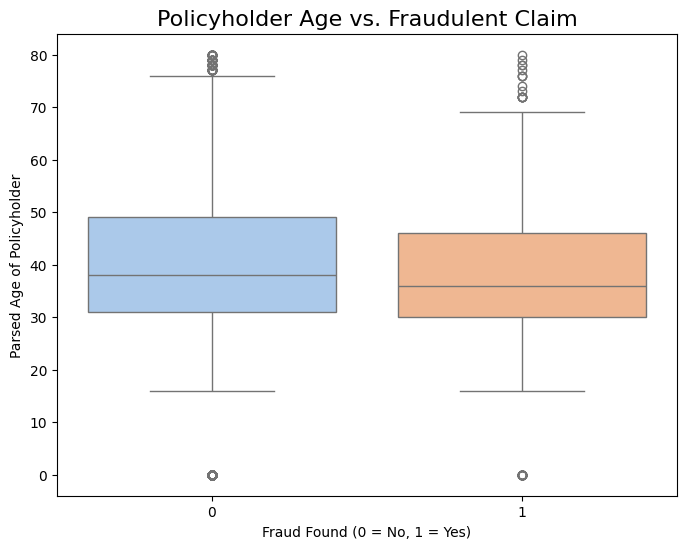

Conclusion: There is a significant difference in age between the two groups.


In [7]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# age_map = {
#     '16 to 17': 16.5,
#     '18 to 20': 19,
#     '21 to 25': 23,
#     '26 to 30': 28,
#     '31 to 35': 33,
#     '36 to 40': 38,
#     '41 to 50': 45.5,
#     '51 to 65': 58,
#     'over 65': 70
# }

# df['Age_Numeric'] = df['Age'].map(age_map)

df['Age_Numeric'] = df['Age']


print(f"Rows with unmapped ages (should be 0): {df['Age_Numeric'].isnull().sum()}")



fraud_group = df[df['FraudFound_P'] == 1]['Age_Numeric'].dropna()
non_fraud_group = df[df['FraudFound_P'] == 0]['Age_Numeric'].dropna()

print("\n--- T-Test Results ---")
print(f"Average age of Fraud group (1): {fraud_group.mean():.2f}")
print(f"Average age of Non-Fraud group (0): {non_fraud_group.mean():.2f}")

levene_stat, levene_p = stats.levene(fraud_group, non_fraud_group)
equal_vars = levene_p > 0.05  # Assume equal variance if p > 0.05

# Run the T-Test
t_statistic, p_value = stats.ttest_ind(
    fraud_group,
    non_fraud_group,
    equal_var=equal_vars,
    nan_policy='omit'
)

print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")


plt.figure(figsize=(8, 6))
sns.boxplot(
    x='FraudFound_P',
    y='Age_Numeric',
    data=df,
    palette='pastel'
)
plt.title('Policyholder Age vs. Fraudulent Claim', fontsize=16)
plt.xlabel('Fraud Found (0 = No, 1 = Yes)')
plt.ylabel('Parsed Age of Policyholder')
plt.show()

if p_value < 0.05:
    print("Conclusion: There is a significant difference in age between the two groups.")
else:
    print("Conclusion: There is no significant difference in age between the two groups.")

**Conclusion 2**: An independent samples t-test was conducted to compare the average age of policyholders for fraudulent and non-fraudulent claims. The test found a statistically significant difference (p = 0.0011), with the fraudulent group being slightly younger (M = 38.40) than the non-fraudulent group (M = 39.52).

However, as the box plot illustrates, this difference is not practically significant. The distributions for both groups are visually almost identical, showing that age is not a strong practical predictor of fraud in this dataset.

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Method 3: Chi-Square Test**

Is there a significant relationship between whether a police report was filed and whether the claim was fraudulent?


Contingency Table:
 FraudFound_P           0    1
PoliceReportFiled            
0                  14085  907
1                    412   16

Chi-square Statistic: 3.5511
Degrees of Freedom: 1
P-value: 0.0595
Result: Fail to reject the null hypothesis. No significant relationship was found.


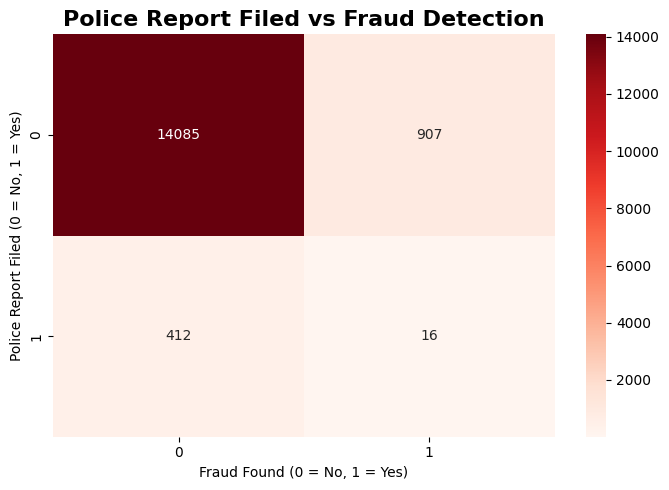

In [9]:
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

contingency = pd.crosstab(df['PoliceReportFiled'], df['FraudFound_P'])
print("Contingency Table:\n", contingency)

chi2, p, dof, expected = chi2_contingency(contingency)

print(f"\nChi-square Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p:.4f}")

if p < 0.05:
    print("Result: Reject the null hypothesis. There is a significant relationship between police report filing and fraud occurrence.")
else:
    print("Result: Fail to reject the null hypothesis. No significant relationship was found.")

plt.figure(figsize=(7,5))
sns.heatmap(contingency, annot=True, fmt='d', cmap='Reds')
plt.title('Police Report Filed vs Fraud Detection', fontsize=16, weight='bold')
plt.xlabel('Fraud Found (0 = No, 1 = Yes)')
plt.ylabel('Police Report Filed (0 = No, 1 = Yes)')
plt.tight_layout()
plt.show()


**Conclusion 3**: I conducted a chi square test of independence to see if there exists a relationship between police report filing and fraudulent claims.

The test produced chi squared statistic of = 3.55, p = 0.0595. Since the p-value is greater than 0.05, we fail to reject the null hypothesis, meaning there is no statistically significant association between these two variables.

The heatmap confirms that both fraudulent and non-fraudulent claims overwhelmingly show “No” for police report filed, suggesting that this feature does not strongly differentiate fraud cases.

Conclusion: Filing a police report does not appear to significantly influence whether a claim is fraudulent in this dataset. While I exptexted that fewer fraud cases with a police report, after conducting the test there does is not a meaningful relationship.


**Part 5 : Primary Analysis**

I am using a supervised ML classficiation technique to predict whether an insurance claim is fraudulent or not. Specifically I use logistic regression to classify each claim into either fraudulent or non-fraudulent based on claim and policy features.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Define features and target
X = df.drop(columns=['FraudFound_P'])
y = df['FraudFound_P']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# Train logistic regression model
model = LogisticRegression(
    max_iter=3000,
    class_weight='balanced'
)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.6089494163424124

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.59      0.74      4349
           1       0.12      0.90      0.22       277

    accuracy                           0.61      4626
   macro avg       0.56      0.74      0.48      4626
weighted avg       0.94      0.61      0.71      4626



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


PART 5 Reasoning:

Our target variable FraudFound_P is binary (0 = non-fraudulent claim, 1 = fraudulent claim), so we frame the problem as a supervised binary classification task rather than regression.
 We use Logistic Regression as our primary machine learning model. Logistic Regression is appropriate here because itt is designed for yes/no (binary) outcomes, which matches our fraud label and it provides probability scores

In our pipeline, we encoded categorical variables (such as BasePolicy, AccidentArea, etc.) and kept numeric features (such as PastNumberOfClaims, NumberOfCars, Deductible). We split the data into training and test sets and trained a Logistic Regression classifier on the training data to predict FraudFound_P.

Evaluated the model on the test set using accuracy, precision, recall, and F1-score, with particular attention to performance on the fraud class (1) because fraud cases are relatively rare and more costly to miss. Because only about 6% of all claims in the dataset are fraudulent, accuracy alone is misleading. Predicting every claim as non-fraudulent would already achieve around 94% accuracy. This is why recall and F1-score are more meaningful evaluation metrics for this task.

Due to the strong class imbalance in the dataset, we used a class-weighted logistic regression model to reduce bias toward non-fraudulent claims. While this reduced overall accuracy, it significantly improved recall for fraudulent claims, which is more appropriate for fraud detection tasks. The large number of features created during one-hot encoding increases the dimensionality of the data, which is why the logistic regression model required a high iteration limit to converge.


Part 6

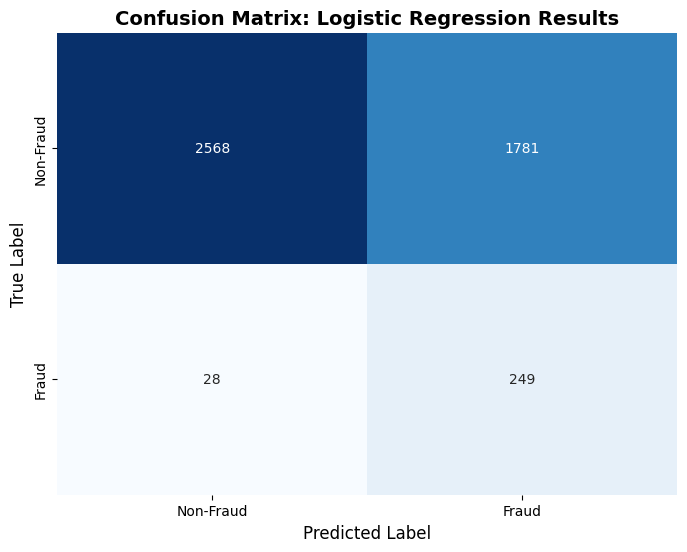

Area of roc curve is 0.7924457508386094


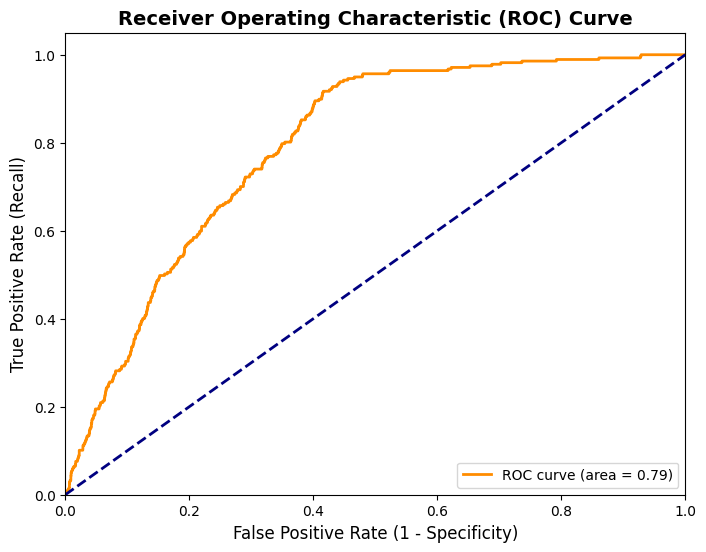

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# 1. Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix: Logistic Regression Results', fontsize=14, weight='bold')
plt.show()

# 2. ROC Curve Visualization
# Getting the probability scores for the positive class (Fraud)
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print(f"Area of roc curve is {roc_auc}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14, weight='bold')
plt.legend(loc="lower right")
plt.show()

To evaluate how well the Logistic Regression model performed, I used two visualizations: the Confusion Matrix and the ROC curve. The Confusion Matrix breaks down the model's predictions into correct and incorrect classifications. Based on the results, the model correctly predicted 2,568 real claims and 249 fraud claims, but it also falsely flagged 1,781 real claims as fraud and missed 28 fraud cases. This suggests that the model is tuned to catch as much fraud as possible, prioritizing recall. In other words, it's willing to trigger more false alarms if it means very few actual fraud cases get overlooked.

The ROC curve helps visualize the model's discrimination ability across different thresholds. Since the curve bends toward the top-left corner and the AUC score is 0.79, it indicates that the model performs significantly better than random guessing. An AUC close to 1 would be ideal, but 0.79 still shows that the model can reliably separate fraudulent claims from legitimate ones. Overall, these results suggest that the model works well as an early detection tool, even though it produces a noticeable number of false positives.

**Insights and Conclusions**

This project walks through the full process of detecting fraud in insurance claims, and by the end, an uninformed reader should understand the main factors related to fraud and how data analysis can be used to uncover them. Our exploration showed that fraud is much more common in the All Perils policy type, while factors such as age and police report filing do not meaningfully separate fraudulent from non-fraudulent claims. The statistical tests helped confirm which differences were real and which were too small to matter in practice.

The machine learning model adds another perspective. Logistic regression identified most fraudulent claims, achieving a recall of 0.90, which means the model rarely misses fraud. Its ROC AUC of 0.792 shows that it can reliably rank suspicious claims higher than normal ones. Even a reader with no background in machine learning can understand the main takeaway that fraud detection is difficult, accuracy alone is misleading in imbalanced data, and models must prioritize catching fraud even if that means more false alarms.

For a reader who already has experience with fraud analytics or machine learning, this project still provides useful insight. It shows how categorical features affect model performance after one-hot encoding, illustrates the limits of linear models on mixed data, and highlights why recall, AUC, and confusion matrices are more useful than accuracy in imbalanced scenarios. A reader with prior experience would gain insight into where logistic regression works well and where it struggles, and explains why metrics like recall and AUC matter more than accuracy when fraud cases are rare.

Overall, this project shows how descriptive statistics, hypothesis testing, and machine learning fit together to build a complete understanding of fraudulent behavior in insurance claims. It gives beginners a clear understanding of the topic while still offering thoughtful takeaways for more advanced readers, making the analysis meaningful at both levels.